# **Функции matplotlib**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# чтобы все графики сразу отображались
%matplotlib inline

## Описание самого простого построения графиков:

## График квадратичной функции *y = x²*

- **Данные**: используем `numpy.arange()` для создания последовательности `x` от −10 до 10 с шагом 0.1, а затем вычисляем `y = x**2`.  
- **Фигура**: задаём размер 13 × 8 дюймов и повышаем чёткость, указав `dpi=150`.  
- **Основная кривая**: рисуем зависимость `y = x²` красной линией (`"r"`).  
- **Подписи**: подписываем оси (`xlabel`, `ylabel`) и ставим заголовок (`title`).  
- **Дополнительная кривая**: добавляем зеркало — график `x = y²`, меняя местами оси.  
- **Детали**: в Python 3 префикс `u""` для русских строк не обязателен, но его можно оставить для совместимости.  

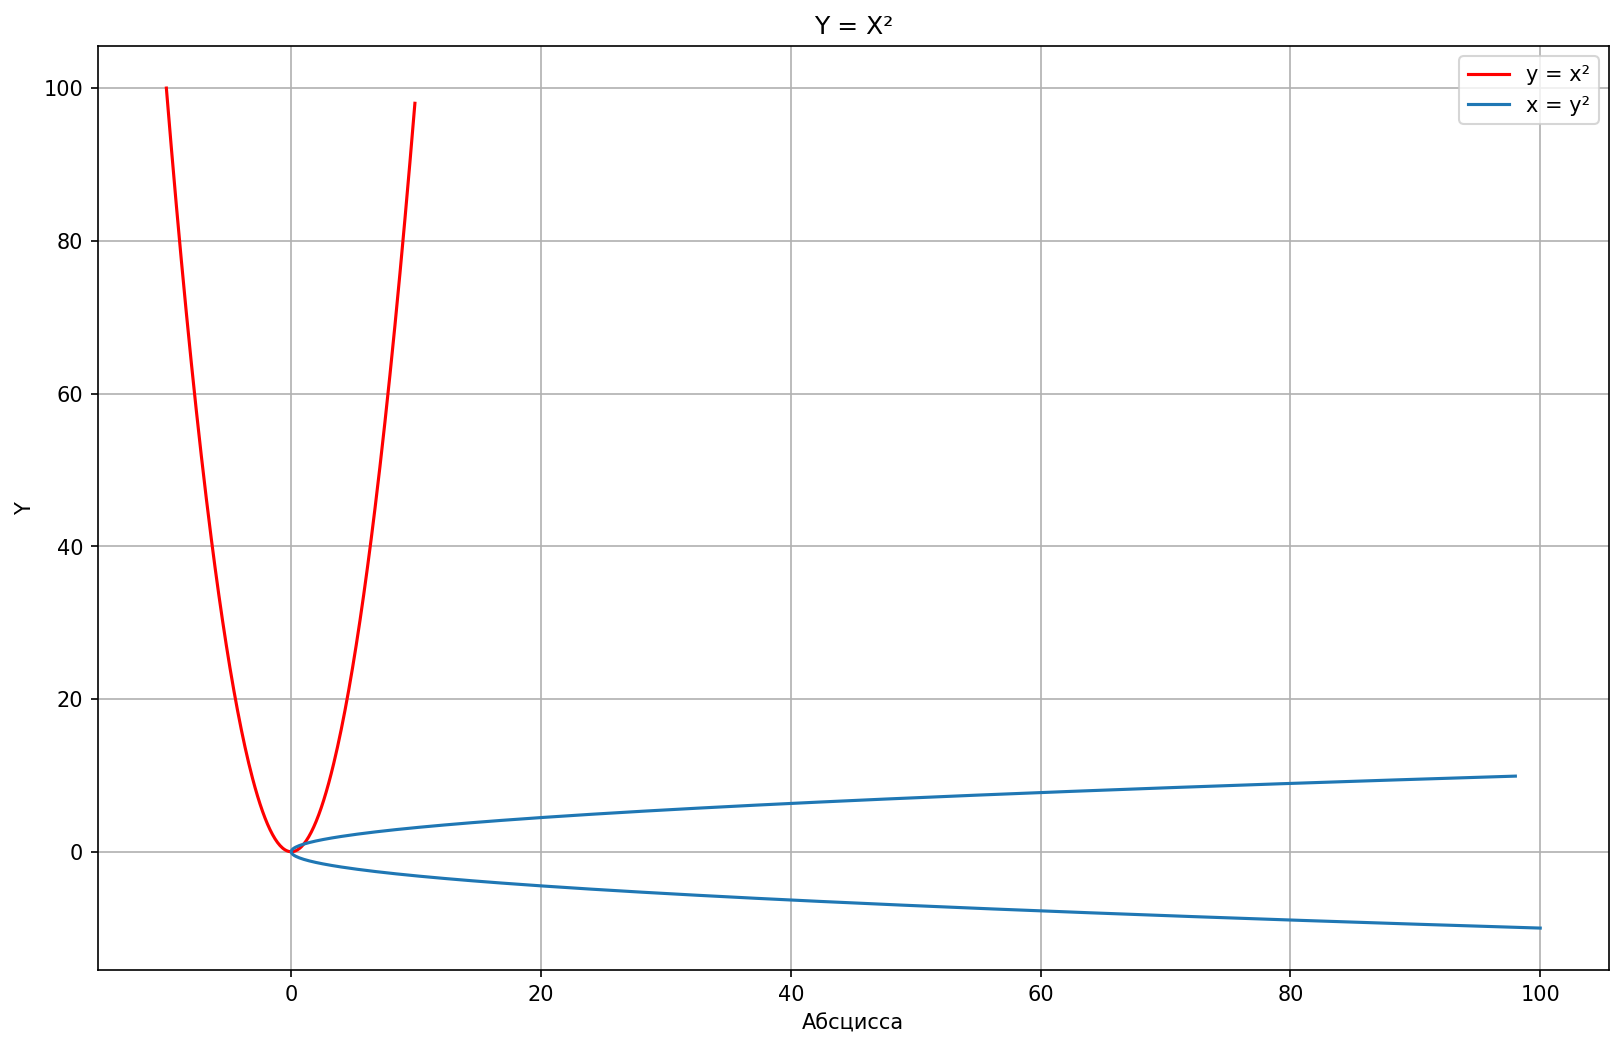

In [12]:
# --- данные ---
x = np.arange(-10, 10, 0.1)
y = x**2

# --- фигура ---
plt.figure(figsize=(13, 8), dpi=150)

# --- основной график y = x² ---
plt.plot(x, y, "r", label="y = x²")

# --- подписи и заголовок ---
plt.xlabel("Абсцисса")
plt.ylabel("Y")
plt.title("Y = X²")

# --- дополнительный график x = y² ---
plt.plot(y, x, label="x = y²")

# --- оформление ---
plt.legend()
plt.grid(True) # сетка

## ⚠️ ВАЖНОЕ УТОЧНЕНИЕ

> **Сохранять графики нужно до вызова `plt.show()`**  
> Потому что **после `plt.show()` полотно очищается**, и сохранённое изображение окажется **пустым**!
>
> 📌 **Правильный порядок:**
> 1. Построить график
> 2. Вызвать `plt.savefig(...)`
> 3. Только потом — `plt.show()`

In [ ]:
# Сохранение:
plt.savefig("1.png") # здесь при приближение резрешение будет уменьшаться
plt.savefig("1.svg") # здесь при приближение р

plt.show() # с этой строчкой не будет выдаваться идентификатор объекта

## Как сделать несколько графиков:

## Фигура (Figure)

- **Figure** — это всё изображение, «полотно», на котором могут располагаться один или несколько графиков.  
- Создаётся командой `plt.figure()`. По умолчанию получается пустая фигура размером 640 × 480 px.

In [16]:
fig = plt.figure() 

<Figure size 640x480 with 0 Axes>

## Оси (Axes)

- **Axes** — область внутри фигуры, где непосредственно рисуется график.  
- При добавлении осей методом `add_axes()` нужно передать **четыре** значения:  
  1. `x` — горизонтальная координата левого нижнего угла,  
  2. `y` — вертикальная координата левого нижнего угла,  
  3. `width` — ширина,  
  4. `height` — высота.  

Все четыре параметра задаются в **долях от размера фигуры** (от 0 до 1).

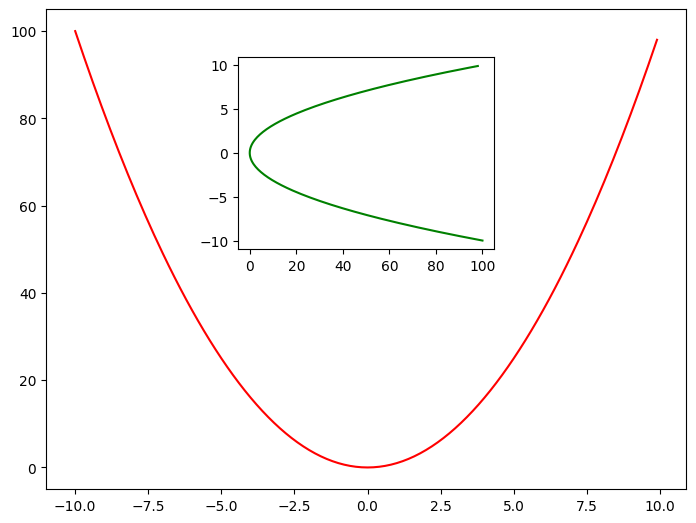

In [27]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y, "r")
# fig.show()

axes_2 = fig.add_axes([0.3, 0.5, 0.4, 0.4])
axes_2.plot(y, x, "g")

## Быстрое создание сетки графиков с `plt.subplots`

- **`plt.subplots(2, 2, figsize=(13, 8))`**  
  Создаёт фигуру `13 × 8` дюймов и **4** подграфика в виде массива  
  `axes[строка][столбец]` (2 × 2).

- **`axes[i][j].plot(…)`**  
  Строит линию в нужной ячейке:  
  - `axes[0][0]` — красная (`"r"`) кривая `x` vs `y`;  
  - `axes[0][1]` — зелёная (`"g"`) кривая `y` vs `x`;  
  - `axes[1][0]` — синяя (`"b"`) кривая `x` vs `y`;  
  - `axes[1][1]` — чёрная (`"k"`) кривая `x` vs `y`.

- **Подписи и заголовки**  
  Для каждого подграфика вызываются  
  `set_xlabel("x")`, `set_ylabel("y")`, `set_title("Title")`.

- **`fig.tight_layout()`**  
  Автоматически подбирает отступы между подграфиками,  
  чтобы подписи и заголовки не перекрывались.

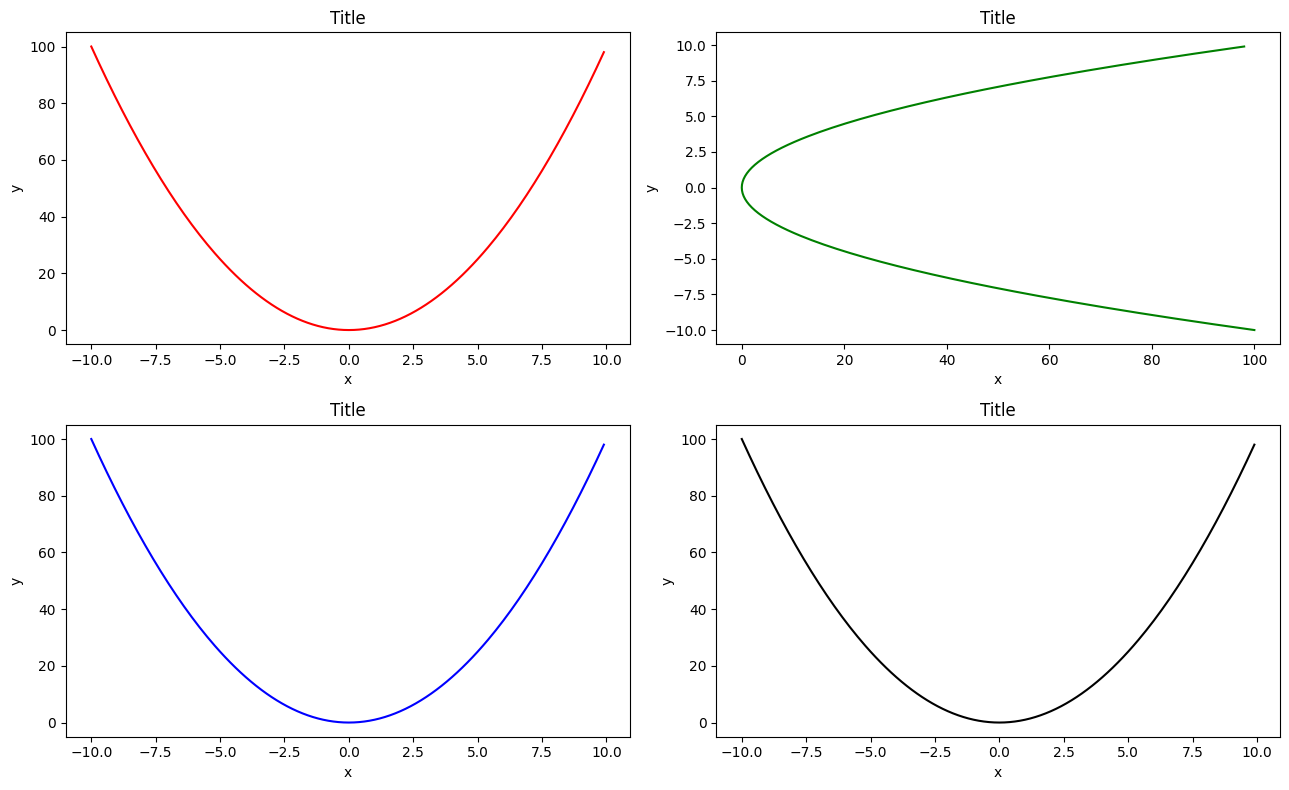

In [32]:
# Если нам не нужна такая гибкость как поаказана выше в построении графиков то можно использовать функциб subplots:

fig, axes = plt.subplots(2, 2, figsize=(13, 8))

axes[0][0].plot(x, y, "r")
axes[0][0].set_xlabel("x")
axes[0][0].set_ylabel("y")
axes[0][0].set_title("Title")

axes[0][1].plot(y, x, "g")
axes[0][1].set_xlabel("x")
axes[0][1].set_ylabel("y")
axes[0][1].set_title("Title")

axes[1][0].plot(x, y, "b")
axes[1][0].set_xlabel("x")
axes[1][0].set_ylabel("y")
axes[1][0].set_title("Title")

axes[1][1].plot(x, y, "k")
axes[1][1].set_xlabel("x")
axes[1][1].set_ylabel("y")
axes[1][1].set_title("Title")

fig.tight_layout()

In [38]:
x = np.arange(0.1, 5, 0.1)

def f(x):
    return x ** 2

def g(x):
    return 1 / x

def h(x):
    return x * np.sin(x)

## Легенда и подписи с LaTeX

- **Математические подписи**  
  В аргументе `label` для каждой кривой используется синтаксис LaTeX, 
  заключённый в `$ … $` (или `r"…"` вместе с `$`):  

- **Размер шрифта (`fontsize`)**  

- **Легенда `fig.legend(loc=5, fontsize=18)`**  
  - `loc=5` — размещает легенду в позиции **«lower right»**  
    (см. таблицу кодов: 0 – «best», 1 – «upper right», …, 5 – «lower right»).  

> Остальные методы (`plot`, `plt.subplots`, `tight_layout` и т.д.) уже были подробно описаны выше.

### Параметры функции `plot()` в Matplotlib

- **`alpha`** — прозрачность линии или маркеров.  
  Значение от `0` (полностью прозрачный) до `1` (полностью непрозрачный).  
  *Пример:* `alpha=0.5` делает линию полупрозрачной.

- **`linewidth`** или **`lw`** — толщина линии.  
  Измеряется в пунктах (points).  
  *Пример:* `linewidth=2` рисует более толстую линию.  
  Если указать `linewidth=0` или `lw=0`, линия исчезнет, и останутся только маркеры.

- **`marker`** — стиль маркера (фигура, обозначающая точки на линии).  
  Примеры значений:  
  - `"o"` — круг  
  - `"s"` — квадрат  
  - `"^"` — треугольник вверх  
  - `"x"` — крестик  
  - `"+"` — плюс  
  - `"."` — точка  
  - см. полный список в [документации Matplotlib](https://matplotlib.org/stable/api/markers_api.html)

- **`markersize`** или **`ms`** — размер маркера.  
  Значение указывается в пунктах.  
  *Пример:* `markersize=10` рисует крупные маркеры.

- **`markerfacecolor`** или **`mfc`** — цвет заливки маркера.  
  Можно указывать по имени (`"red"`), в HEX (`"#FF0000"`) или с прозрачностью через RGBA.

- **`markeredgewidth`** или **`mew`** — толщина рамки маркера (обводки).  
  Указывается в пунктах.  
  *Пример:* `markeredgewidth=2` создаёт более заметную обводку.

💡 **Приём:** если хотите отобразить только точки (без линии), укажите `linewidth=0` и выберите маркер:
```python
plt.plot(x, y, marker="o", linewidth=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


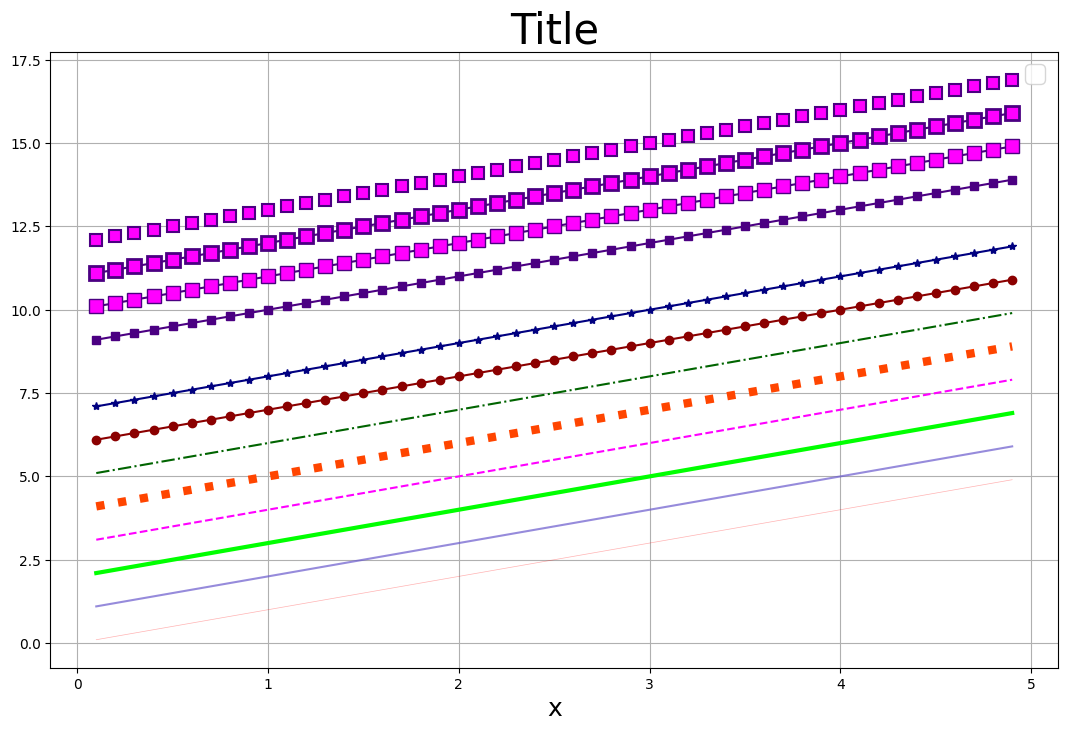

In [95]:
fig, axes = plt. subplots(figsize=(13, 8))

axes.plot (x, x, color='red', alpha=0.3, linewidth=0.5)
axes.plot (x, x+1, color='#6A5ACD', alpha=0.7)
axes.plot (x, x+2, color='#00FF00', alpha=1, linewidth=3)


axes.plot (x, x+3, color='#FF00FF', linestyle='--')
axes.plot (x, x+4, color='#FF4500', linestyle=':', linewidth=6)
axes.plot (x, x+5, color='#006400', linestyle='-.')

axes.plot (x, x+6, color='#8B0000', marker='o')
axes.plot (x, x+7, color='#000080', marker='*')
axes.plot (x, x+9, color='#4B0082', marker='s')
axes.plot (x, x+10, color='#4B0082', marker='s', markersize=10, markerfacecolor="#FF00FF")
axes.plot (x, x+11, color='#4B0082', marker='s', markersize=10, markerfacecolor="#FF00FF", markeredgewidth=2)
axes.plot (x, x+12, color='#4B0082', linewidth=0, marker='s', markersize=8, markerfacecolor="#FF00FF", markeredgewidth=1.5)



axes.set_title('Title', fontsize=30)
axes .set_xlabel('x', fontsize=18)
axes.legend(fontsize=18)
axes.grid(True)
plt.show()

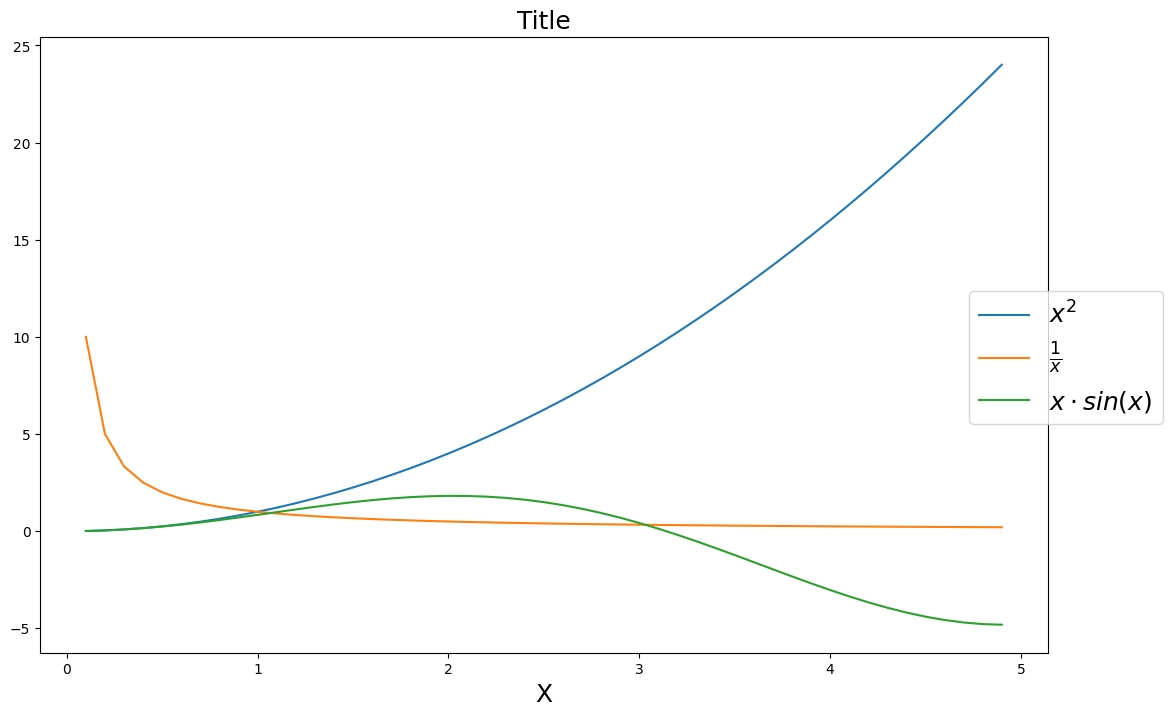

In [58]:
fig, axes = plt.subplots(figsize=(13, 8))
axes.plot(x, f(x), label="$x^2$")
axes.plot(x, g(x), label=r"$\frac{1}{x}$")
axes.plot(x, h(x), label=r"$x \cdot sin(x)$")
axes.set_xlabel("X", fontsize=18)
axes.set_title("Title", fontsize=18)

fig.legend(loc=5, fontsize=18)

### Задача про работу с картинками

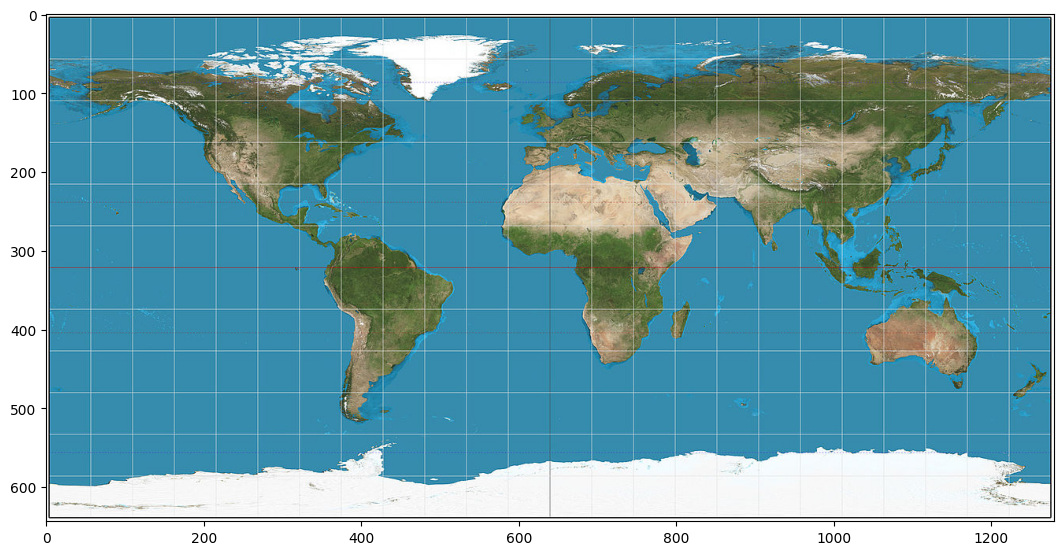

In [110]:
fig, axes = plt.subplots(figsize=(13, 8))

with open('world.jpg', 'rb') as map_file:
    map_img = plt.imread(map_file)

axes.imshow(map_img)
plt.show()

### Пример того как можно отобразить часть графика и приблизить какую-то его часть

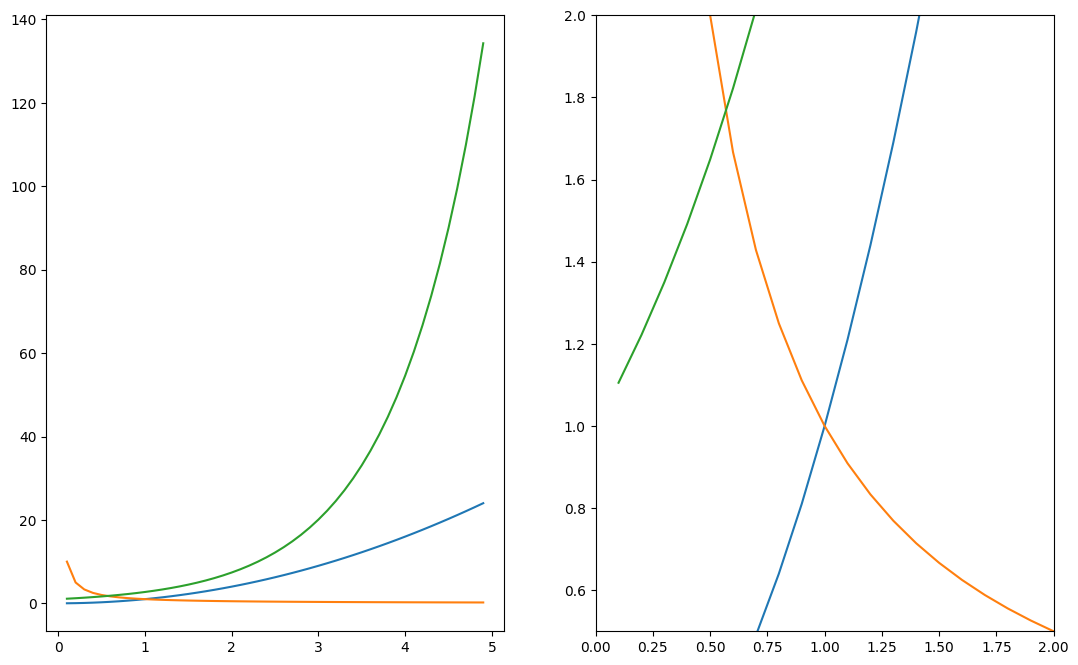

In [101]:
x = np.arange(0.1, 5, 0.1)

def f(x):
    return x ** 2

def g(x):
    return 1 / x

def h(x):
    return np.exp(x)

fig, axes = plt.subplots(1, 2, figsize=(13, 8))

axes[0].plot(x, f(x), x, g(x), x, h(x))
axes[1].plot(x, f(x), x, g(x), x, h(x))

axes[1].set_xlim(0, 2)
axes[1].set_ylim(0.5, 2)

plt.show()

## Логарифмическая шкала осей в Matplotlib

Иногда данные удобнее анализировать, если использовать не линейный, а другой масштаб осей.  
В Matplotlib это можно сделать с помощью методов `set_xscale()` и `set_yscale()`.

**Какие оси можно менять:**
- Ось **X** — `set_xscale()`
- Ось **Y** — `set_yscale()`
- Обе оси сразу — вызвать оба метода

**Доступные типы масштаба:**
- `linear` — линейный масштаб (по умолчанию)
- `log` — логарифмический масштаб (только положительные значения)
- `symlog` — симметричный логарифмический масштаб (подходит для данных с отрицательными значениями)
- `logit` — логит-масштаб (для вероятностей в диапазоне (0, 1))

**Пример:**
На двух графиках ниже отображён один и тот же набор функций:
- Слева — линейная шкала по оси Y.
- Справа — логарифмическая шкала по оси Y, при которой экспоненциальная кривая превращается в прямую.

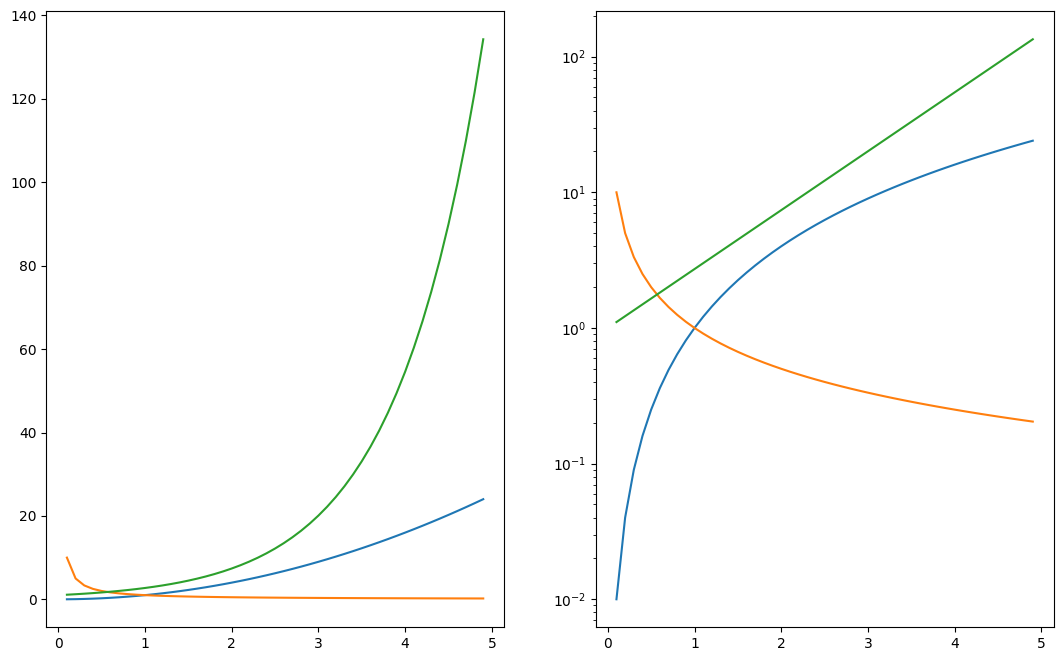

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(13, 8))

axes[0].plot(x, f(x), x, g(x), x, h(x))
axes[1].plot(x, f(x), x, g(x), x, h(x))

axes[1].set_yscale("log")

[Text(0, 20, '20.000'),
 Text(0, 40, '40.000'),
 Text(0, 60, '60.000'),
 Text(0, 80, '80.000'),
 Text(0, 100, '100.000'),
 Text(0, 120, '120.000'),
 Text(0, 140, '140.000'),
 Text(0, 160, '160.000')]

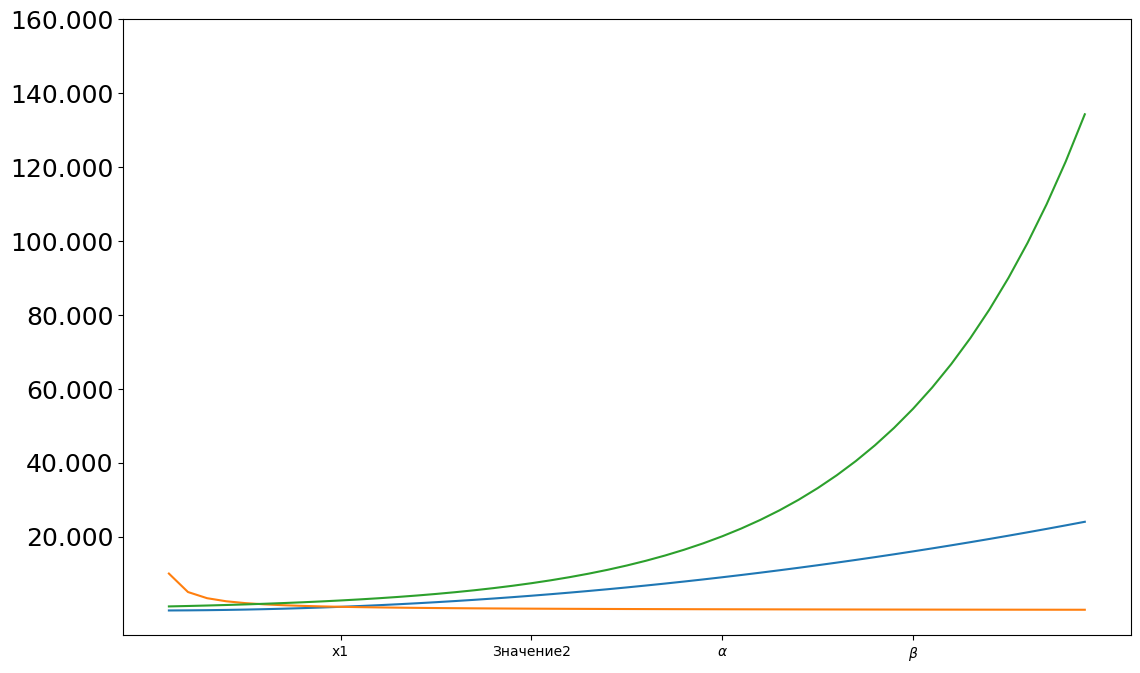

In [108]:
# здесь все понятно

fig, axes = plt.subplots(figsize=(13, 8))

axes.plot(x, f(x), x, g(x), x, h(x))

xtick = [1, 2, 3, 4]
ytick = [20, 40, 60, 80, 100, 120, 140, 160]

axes.set_xticks(xtick)
axes.set_xticklabels(['x1', u'Значение2', r'$\alpha$', r'$\beta$'])
axes.set_yticks(ytick)
axes.set_yticklabels(['{:.3f}'.format(y) for y in ytick], fontsize=18)